# BIAS VARIANCE CROSS VALIDATION

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

C:\Python36\lib\site-packages\matplotlib\__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [2]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

Polynomial Regression

In [3]:
np.random.seed(42)

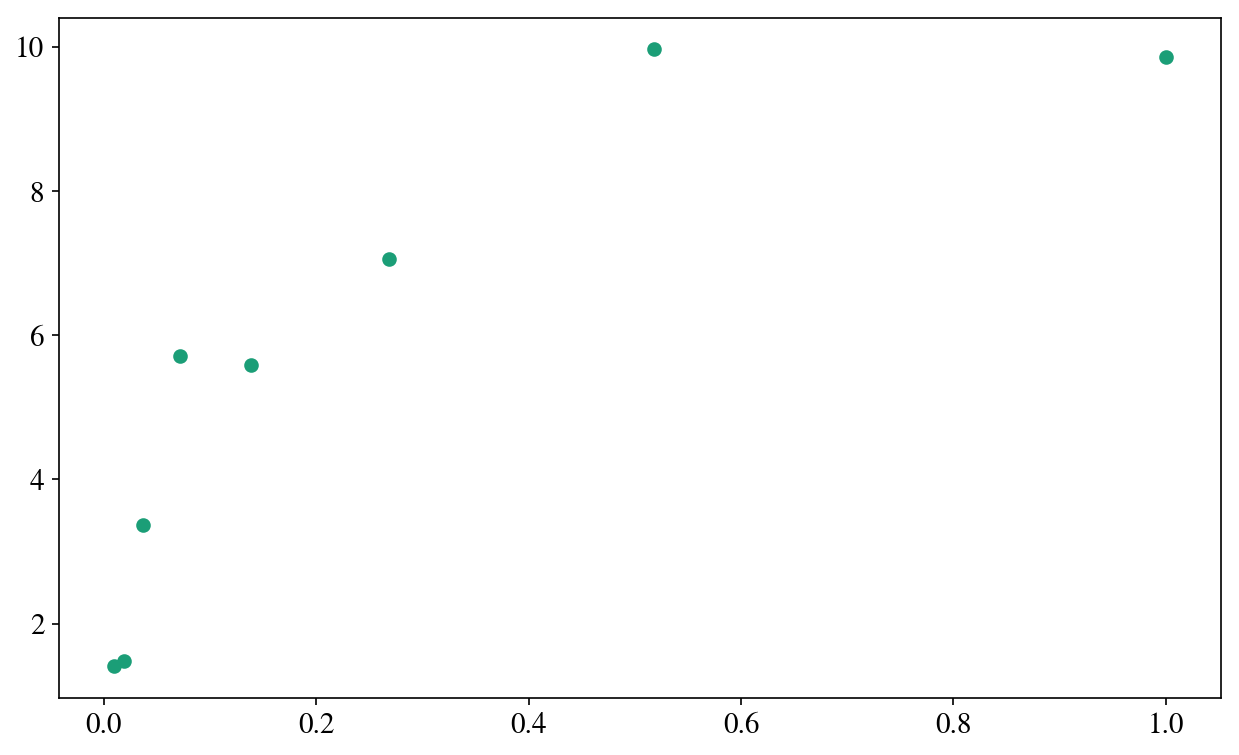

In [4]:
def rmse(p,x,y):
    yfit = np.polyval(p, x)
    return np.sqrt(np.mean((y - yfit) ** 2))

def generate_curve(x, sigma):
    return np.random.normal(10 - 1. / (x + 0.1), sigma)
x = 10 ** np.linspace(-2, 0, 8)
intrinsic_error=1.
y=generate_curve(x, intrinsic_error)
plt.scatter(x,y)

d=1, rmse= 1.70524942832
d=2, rmse= 0.89214139212
d=4, rmse= 0.496552676012
d=6, rmse= 0.132980700607


(-1, 12)

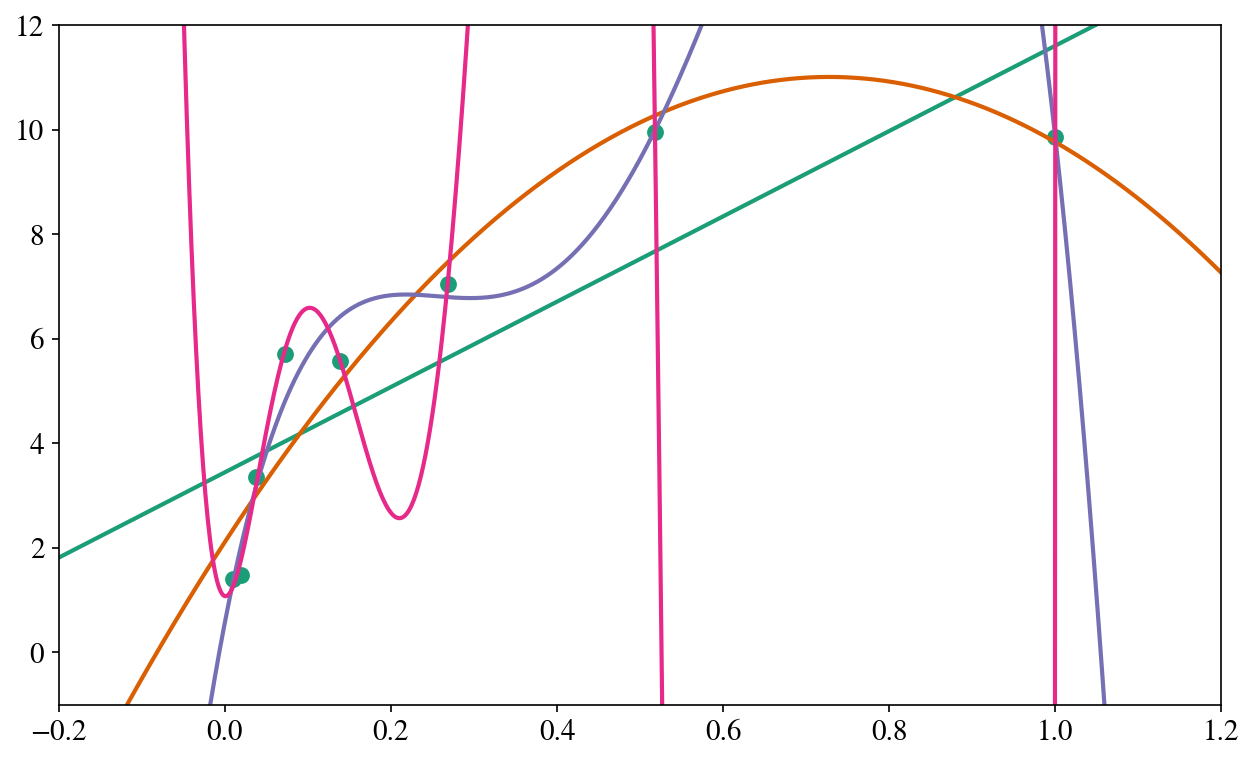

In [7]:
x_new=np.linspace(-0.2, 1.2, 1000)
plt.scatter(x,y, s=50)
f1=np.polyfit(x,y,1)
plt.plot(x_new,np.polyval(f1,x_new))
print ("d=1, rmse=",rmse(f1,x,y))
f2=np.polyfit(x,y,2)
plt.plot(x_new,np.polyval(f2,x_new))
print ("d=2, rmse=",rmse(f2,x,y))
f4=np.polyfit(x,y,4)
plt.plot(x_new,np.polyval(f4,x_new))
print ("d=4, rmse=",rmse(f4,x,y))
f6=np.polyfit(x,y,6)
plt.plot(x_new,np.polyval(f6,x_new))
print ("d=6, rmse=",rmse(f6,x,y))
plt.xlim(-0.2, 1.2)
plt.ylim(-1, 12)

# Constructing a Dataset

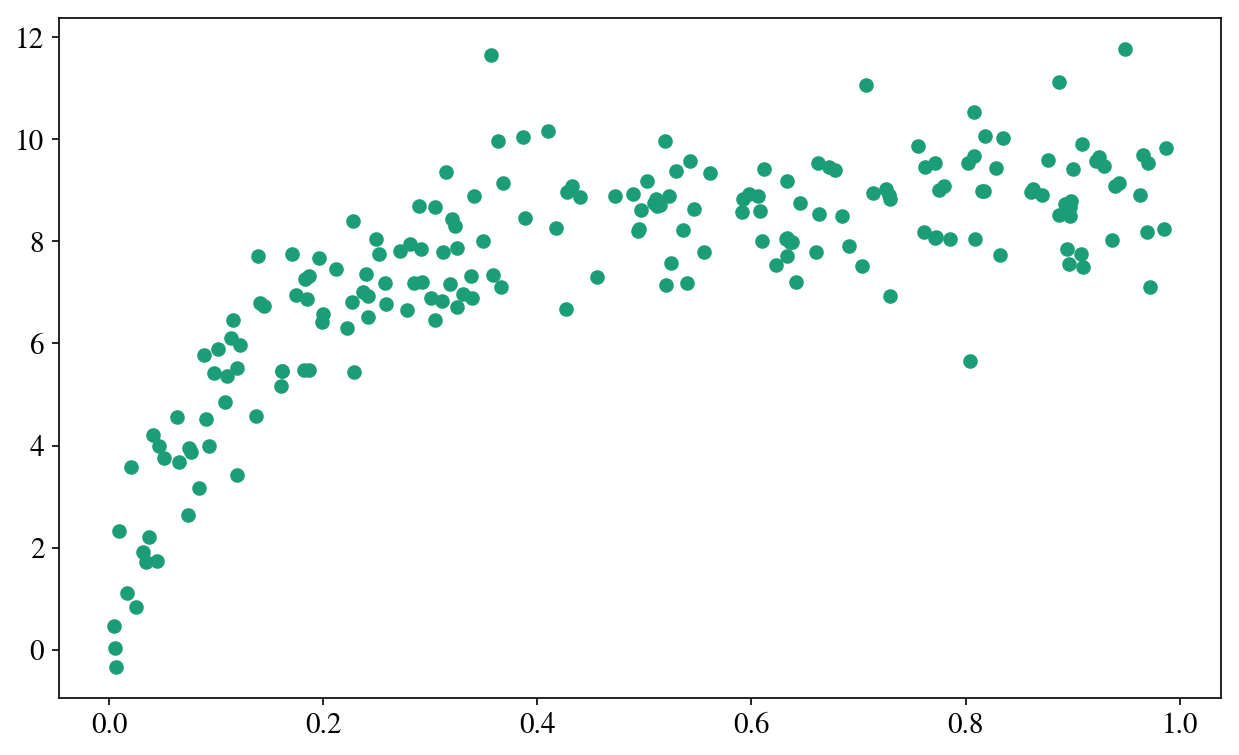

In [8]:
N = 200
x = np.random.random(N)
y = generate_curve(x, intrinsic_error)
plt.scatter(x,y)

C:\Python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


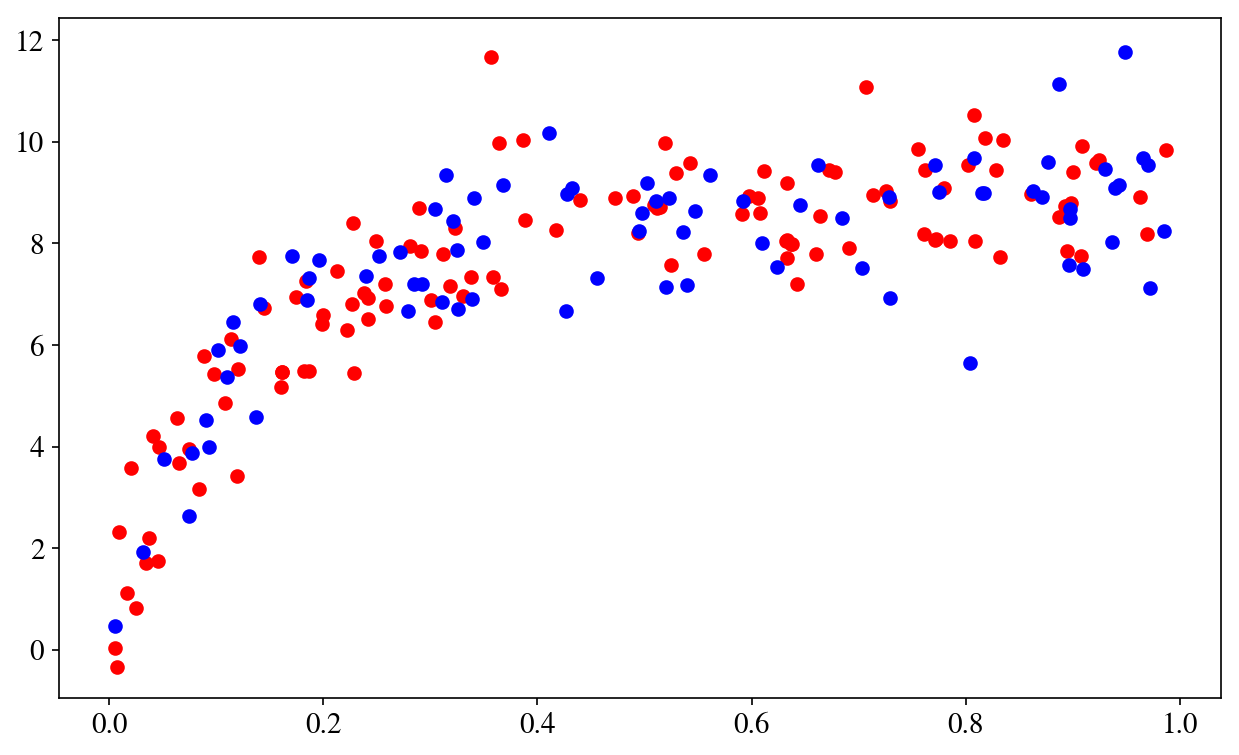

In [9]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.6)
plt.scatter(xtrain, ytrain, color='red')
plt.scatter(xtest, ytest, color='blue')

In [10]:
ds = np.arange(21)
train_err = np.zeros(len(ds))
test_err = np.zeros(len(ds))

for i, d in enumerate(ds):
    p = np.polyfit(xtrain, ytrain, d)

    train_err[i] = rmse(p, xtrain, ytrain)
    test_err[i] = rmse(p, xtest, ytest)

Text(0,0.5,'rms error')

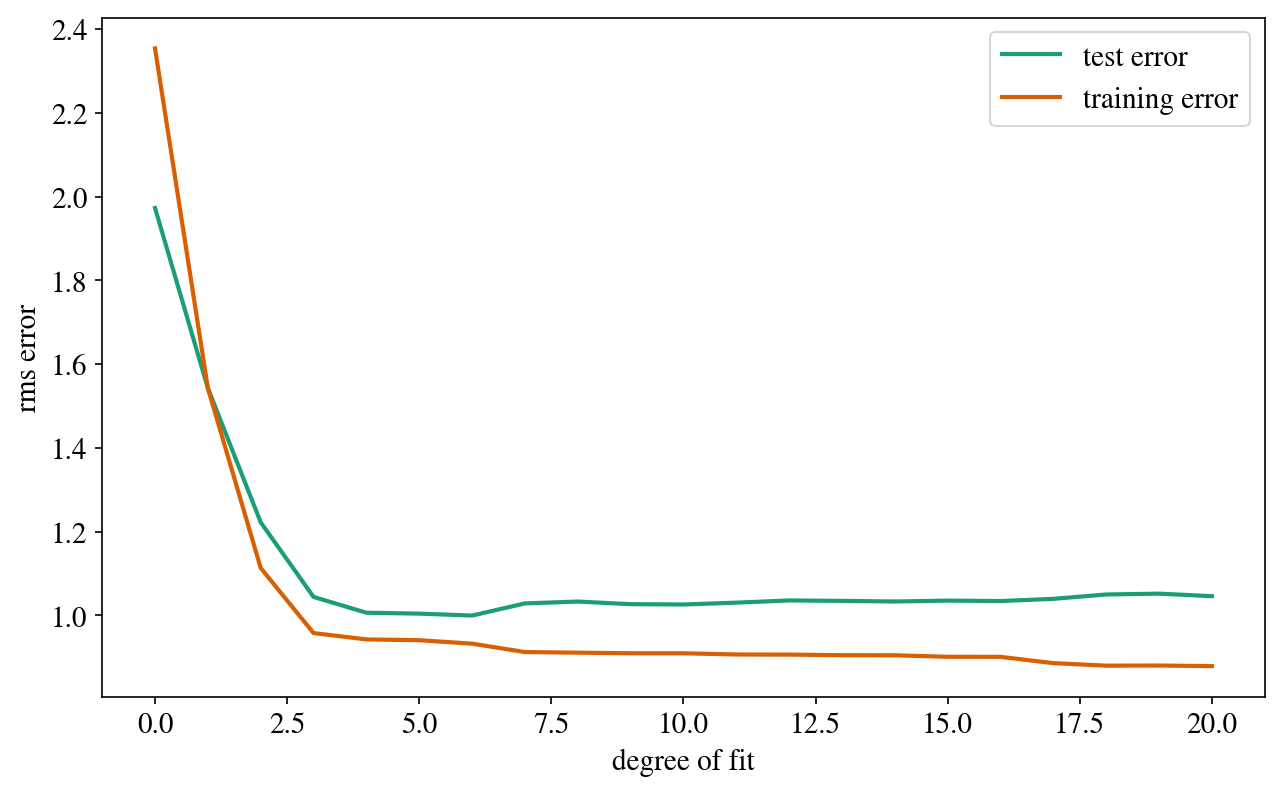

In [11]:
fig, ax = plt.subplots()

ax.plot(ds, test_err, lw=2, label = 'test error')
ax.plot(ds, train_err, lw=2, label = 'training error')
ax.legend(loc=0)
ax.set_xlabel('degree of fit')
ax.set_ylabel('rms error')

# Learning Curves

High Bias

In [12]:
#taken lock stock and barrel from Vanderplas.
def plot_learning_curve(d):
    sizes = np.linspace(2, N, 50).astype(int)
    train_err = np.zeros(sizes.shape)
    crossval_err = np.zeros(sizes.shape)

    for i, size in enumerate(sizes):
        # Train on only the first `size` points
        p = np.polyfit(xtrain[:size], ytrain[:size], d)
        
        # Validation error is on the *entire* validation set
        crossval_err[i] = rmse(p, xtest, ytest)
        
        # Training error is on only the points used for training
        train_err[i] = rmse(p, xtrain[:size], ytrain[:size])

    fig, ax = plt.subplots()
    ax.plot(sizes, crossval_err, lw=2, label='validation error')
    ax.plot(sizes, train_err, lw=2, label='training error')
    ax.plot([0, N], [intrinsic_error, intrinsic_error], '--k', label='intrinsic error')

    ax.set_xlabel('training set size')
    ax.set_ylabel('rms error')
    
    ax.legend(loc=0)
    
    ax.set_xlim(0, 99)

    ax.set_title('d = %i' % d)

(0, 10)

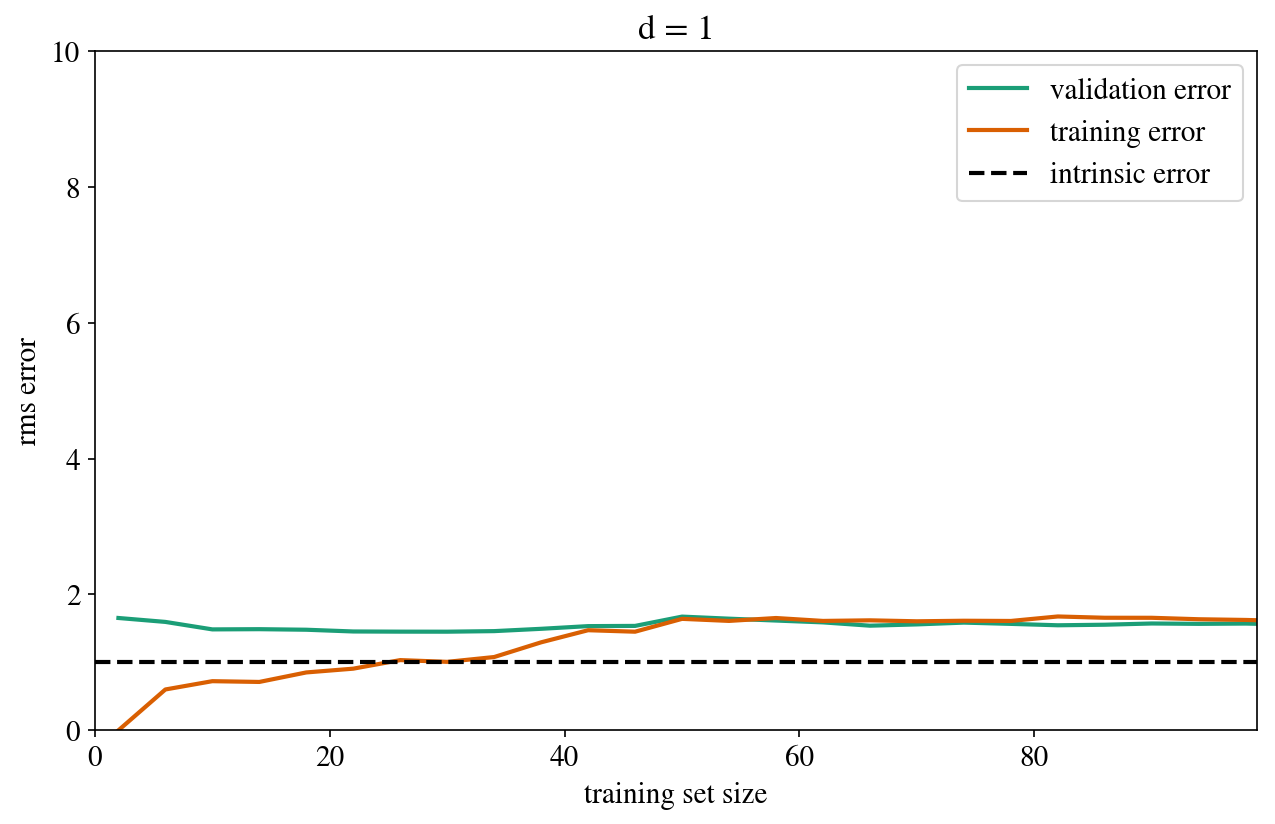

In [13]:
plot_learning_curve(d=1)
plt.ylim(0, 10)

(0, 10)

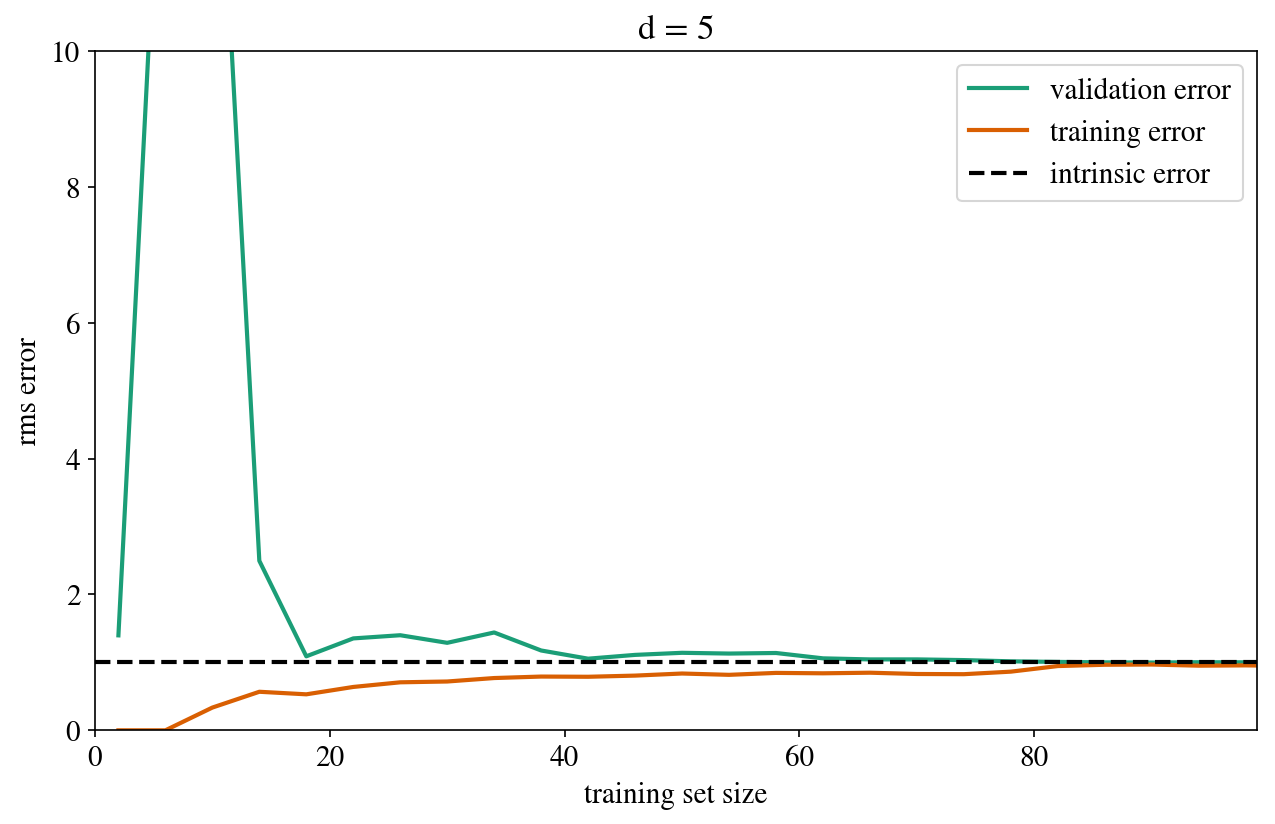

In [14]:
plot_learning_curve(d=5)
plt.ylim(0, 10)

(0, 10)

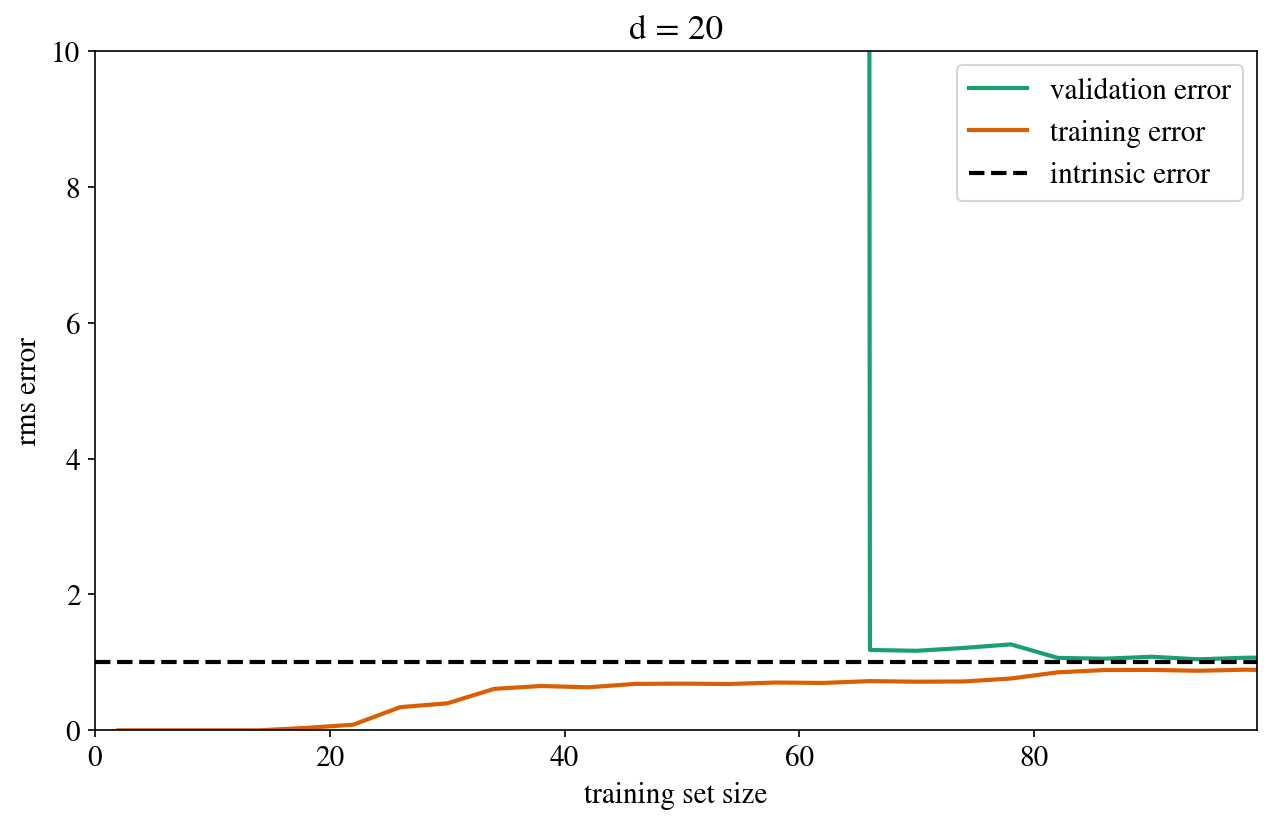

In [15]:
plot_learning_curve(d=20)
plt.ylim(0, 10)

# K-Nearest Neighbors

In [16]:
df=pd.read_csv("C:\\Users\\lenovo\\Desktop\\HERSEY\\KODLAR\\data\\olive.csv")
df.head(5)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [17]:
df.rename(columns={df.columns[0]:'areastring'}, inplace=True)
df.areastring=df.areastring.map(lambda x: x.split('.')[-1])
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
dfsub=df[acidlist].apply(lambda x: x/100.0)
df[acidlist]=dfsub
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [18]:
dfsouth = df[df.region==1]
dfsouthns = dfsouth[df.area != 4]
dfsouthns.head()

C:\Python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


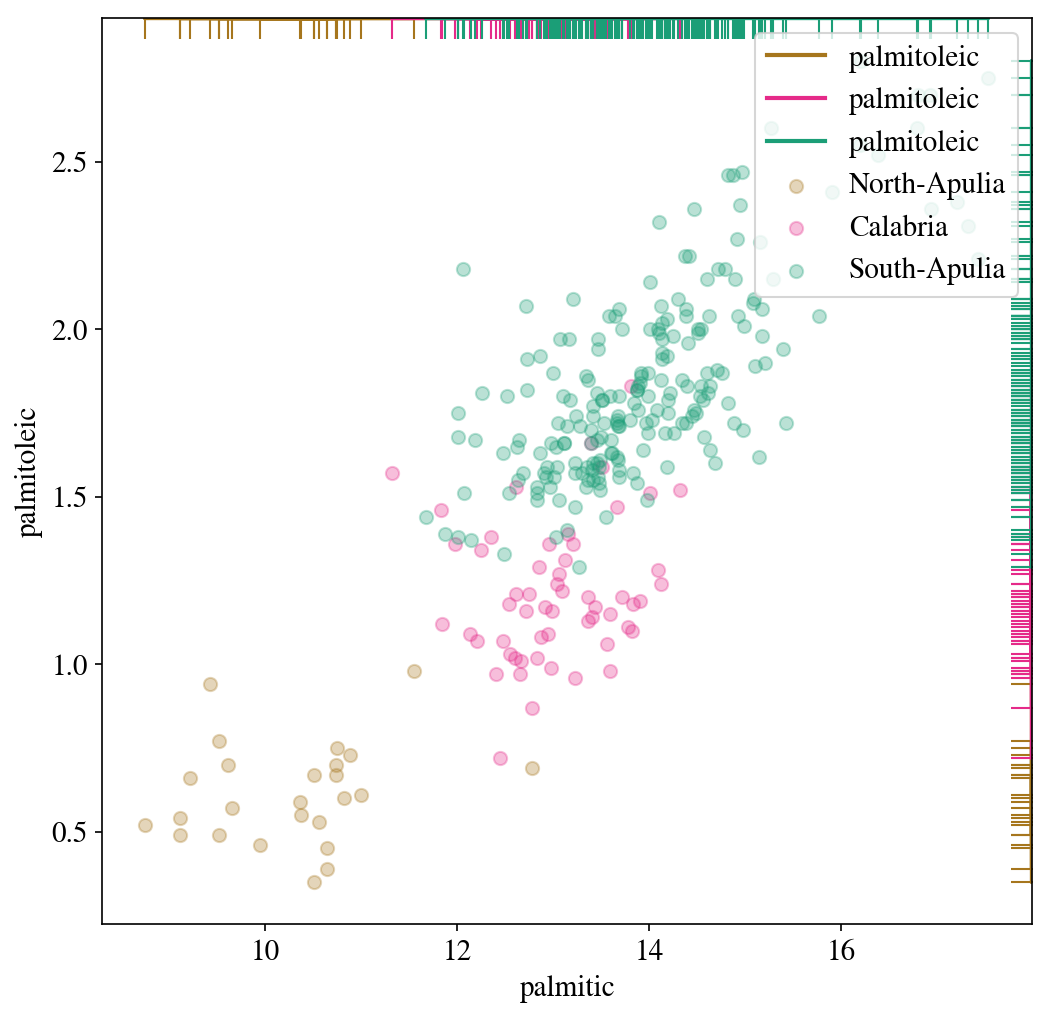

In [19]:
akeys=[1,2,3]
avals=['North-Apulia','Calabria','South-Apulia']
amap={e[0]:e[1] for e in zip(akeys,avals)}
ax=scatter_by(dfsouthns, 'palmitic', 'palmitoleic', by='area', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');

In [20]:
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE", clf.score(Xte, yte))
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return ax


In [21]:
from sklearn.neighbors import KNeighborsClassifier
subdf=dfsouthns[['palmitic','palmitoleic']]
subdfstd=(subdf - subdf.mean())/subdf.std()
X=subdfstd.values
y=dfsouthns['area'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.6)
Xtr=np.concatenate((Xtrain, Xtest))

SCORE 0.930434782609


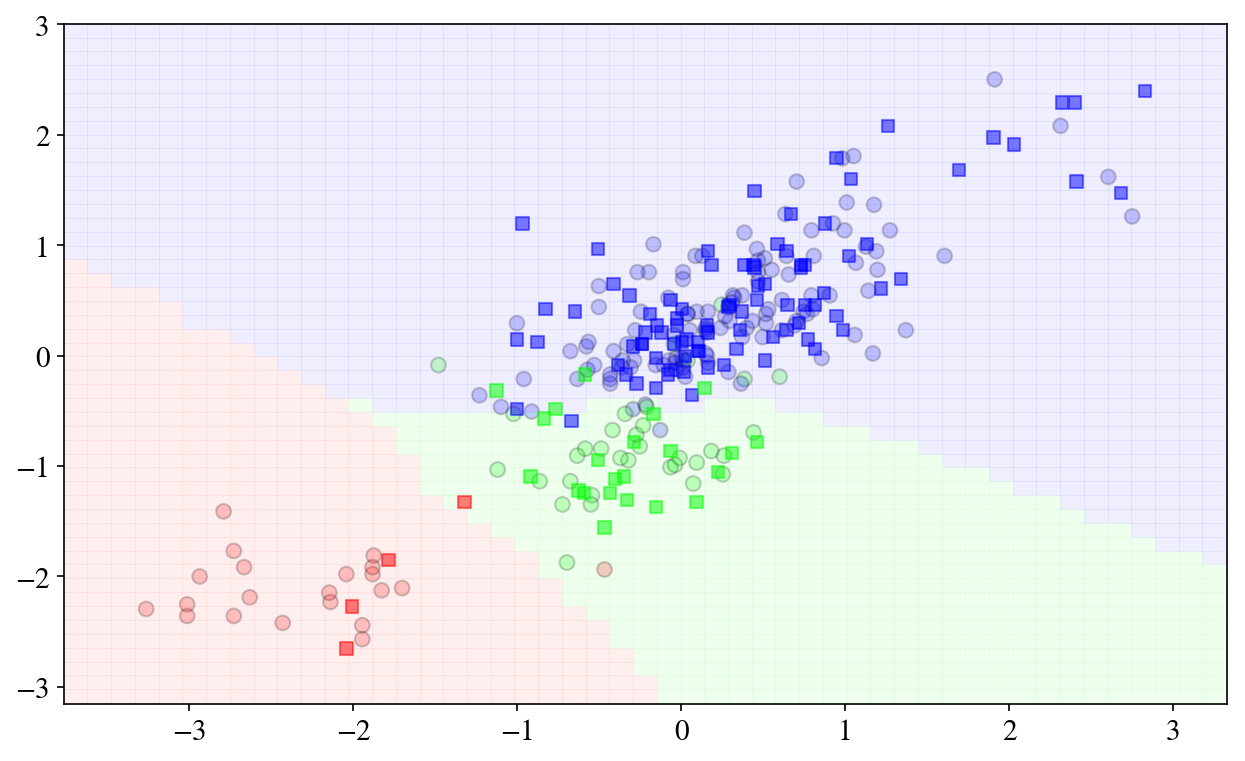

In [22]:
clf = KNeighborsClassifier(20).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

SCORE 0.913043478261


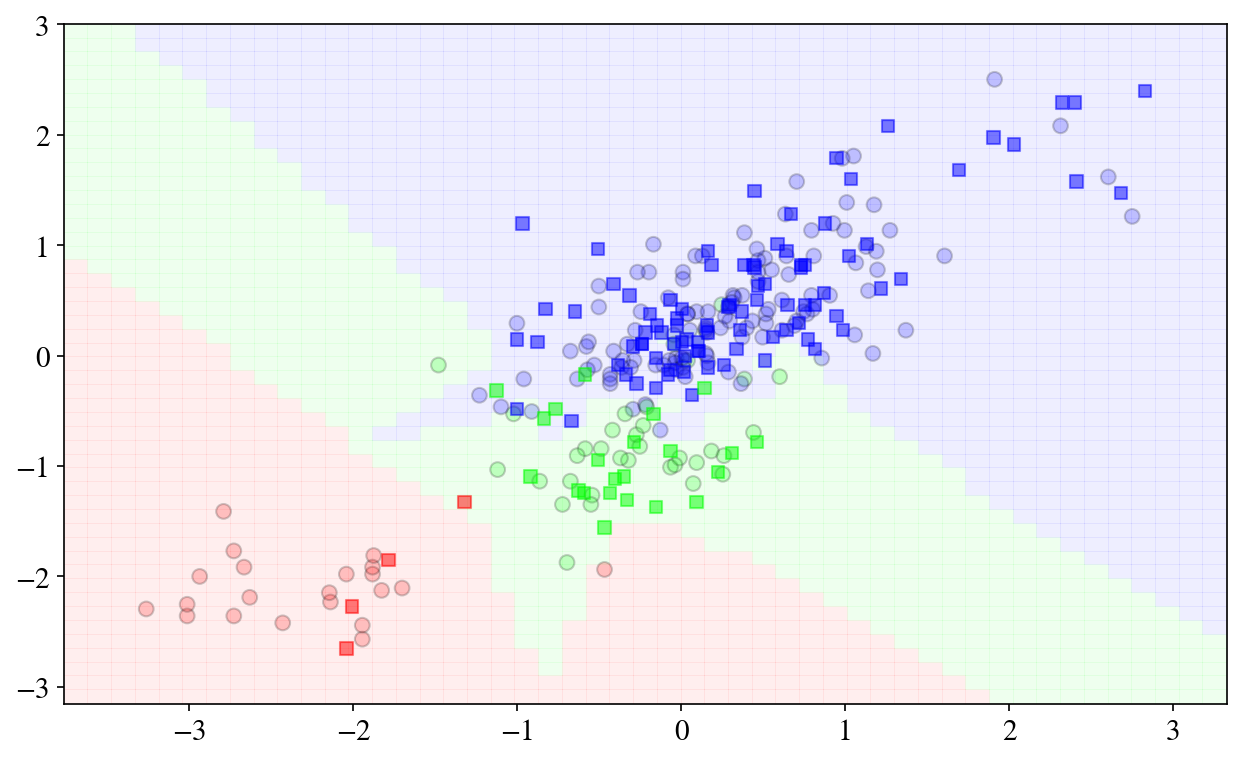

In [23]:
#your code here
clf = KNeighborsClassifier(1).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

SCORE 0.939130434783


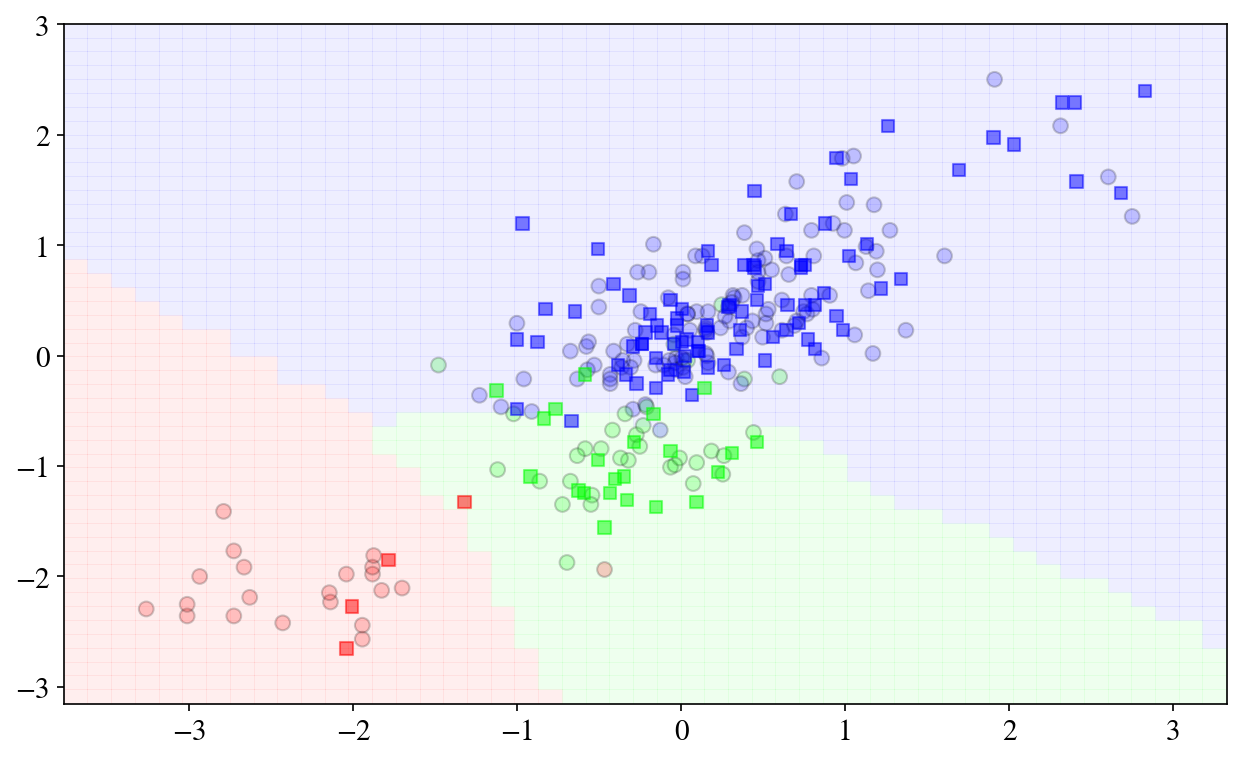

In [24]:
#your code here
clf = KNeighborsClassifier(35).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

(172,) (57,) (58,)
0.775862068966


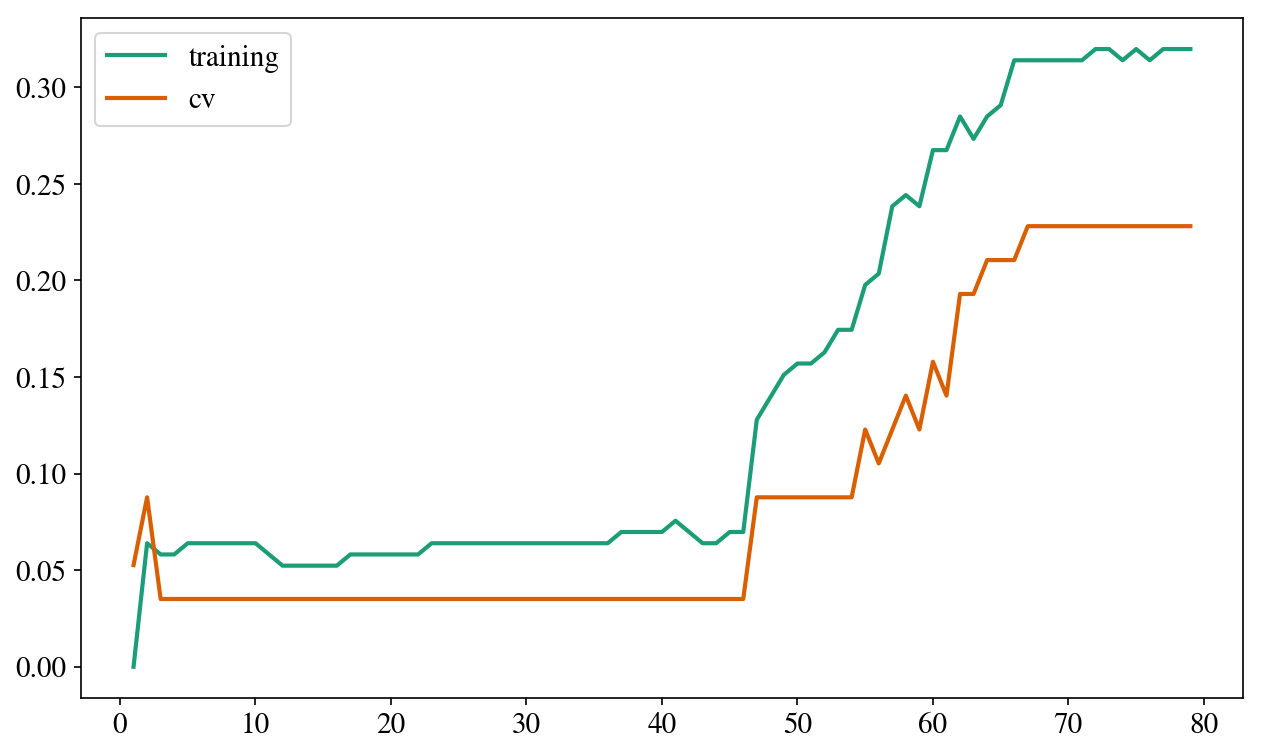

In [25]:
Xcv,Xte,ycv,yte=train_test_split(Xtest, ytest, train_size=0.5)
print (ytrain.shape, ycv.shape, yte.shape)
trscores=[]
cvscores=[]
ns=np.arange(1,80,1)
ones=np.ones(len(ns))
for n in ns:
    clf = KNeighborsClassifier(n).fit(Xtrain, ytrain)
    trscores.append(clf.score(Xtrain, ytrain))
    cvscores.append(clf.score(Xcv, ycv))
plt.plot(ns, ones-trscores, label="training")
plt.plot(ns, ones-cvscores, label="cv")
plt.legend(loc='upper left');
print (clf.score(Xte, yte))

#Train Validate Test

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
Xtr=np.concatenate((Xtrain, Xtest))

In [27]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
parameters = {"n_neighbors": np.arange(1,80,1)}
clf = KNeighborsClassifier()
gs = GridSearchCV(clf, param_grid=parameters, cv=10)
gs.fit(Xtrain, ytrain)
#print gs.grid_scores_
print (gs.best_params_, gs.best_score_)
y_true, y_pred = ytest, gs.predict(Xtest)
print(classification_report(y_true, y_pred))

C:\Python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'n_neighbors': 7} 0.9432314410480349
             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       0.70      0.70      0.70        10
          3       0.93      0.93      0.93        45

avg / total       0.90      0.90      0.90        58



SCORE 0.896551724138


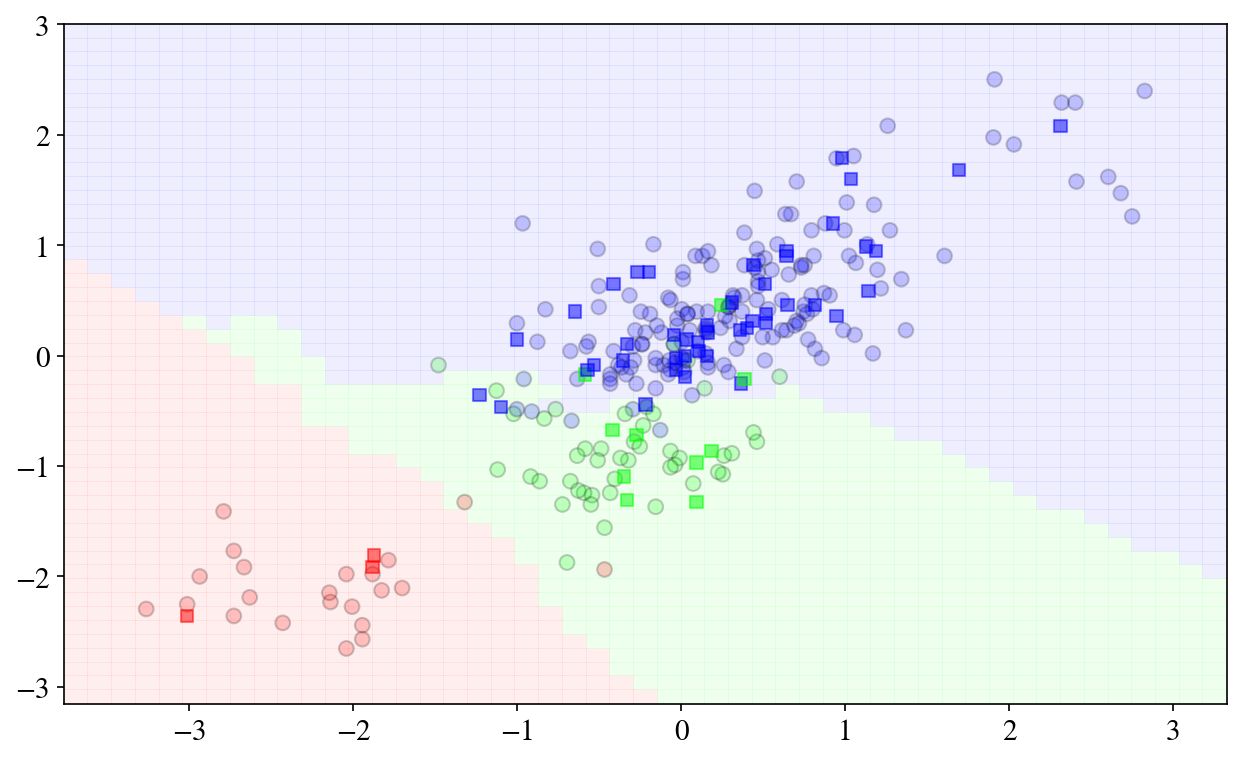

In [28]:
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, gs)